In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
X, y = datasets.make_blobs(n_samples=2000, n_features=3)

In [0]:
df = pd.DataFrame(X, columns=['Feature {:2d}'.format(i) for i in range(3)])
df['Label'] = y

print(df.head())

Feature 0 Feature 1 Feature 2 Label
0 5.907569 -1.078432 -0.204783 2
1 2.767612 -1.592254 -4.795740 1
2 2.074016 -1.832045 -3.309439 1
3 1.504586 -1.700328 -2.019045 1
4 -8.057274 7.190564 -1.157649 0

In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 Feature 0 2000 non-null float64
 1 Feature 1 2000 non-null float64
 2 Feature 2 2000 non-null float64
 3 Label 2000 non-null int64 
dtypes: float64(3), int64(1)
memory usage: 62.6 KB
None

In [0]:
print(df.describe().transpose())

count,mean,std,min,25%,50%,75%,max
2000.0,0.003107656960196412,5.8038211580902175,-11.195665415927412,-6.928077373266882,1.4666472695141592,5.475397673653094,9.2132016424736
2000.0,1.6196882725499118,4.128215310267013,-4.756811021064397,-1.5230784080537925,-0.5483963697347078,6.580717092788138,10.30702541498832
2000.0,-2.5303482790142158,1.4664873934750644,-6.97202051591638,-3.6213550487523696,-2.54948747845112,-1.4573444241938496,1.8879626882229439
2000.0,0.9995,0.8165985345218859,0.0,0.0,1.0,2.0,2.0


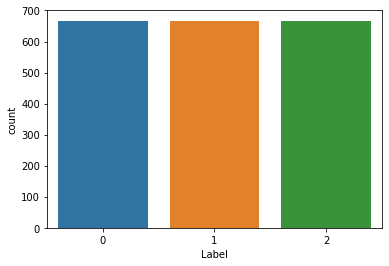

In [0]:
sns.countplot(data=df, x="Label")
plt.show()

Violin Plot: Feature 0

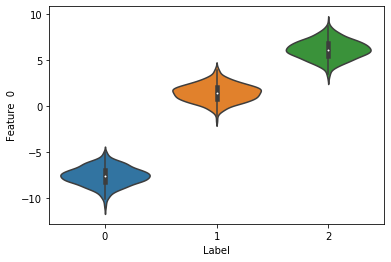

Violin Plot: Feature 1

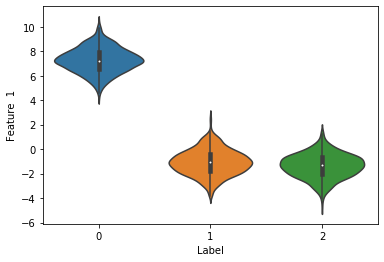

Violin Plot: Feature 2

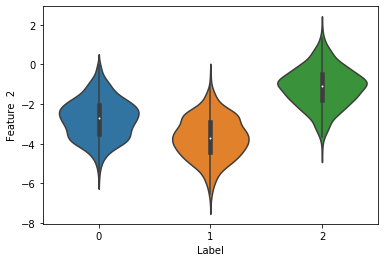

In [0]:
for i in range(3):
  print("Violin Plot: {}".format(df.columns[i]))
  sns.violinplot(y=df.columns[i], x="Label", data=df)
  plt.show()

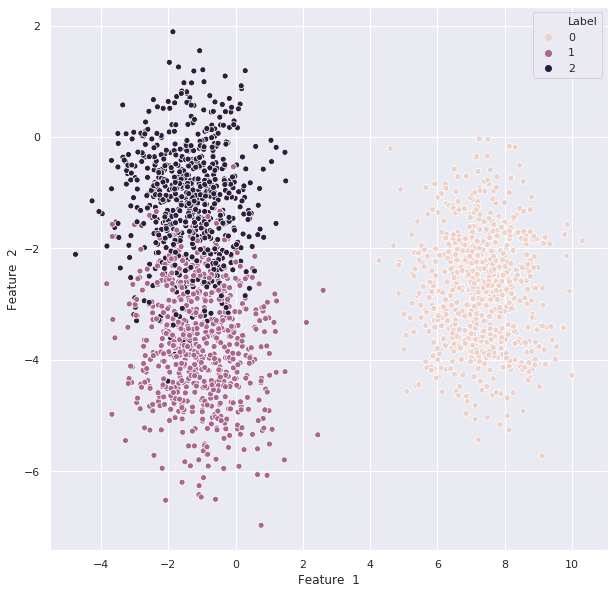

In [0]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(data=df, x=df.columns[1], y=df.columns[2], hue="Label")
plt.show()

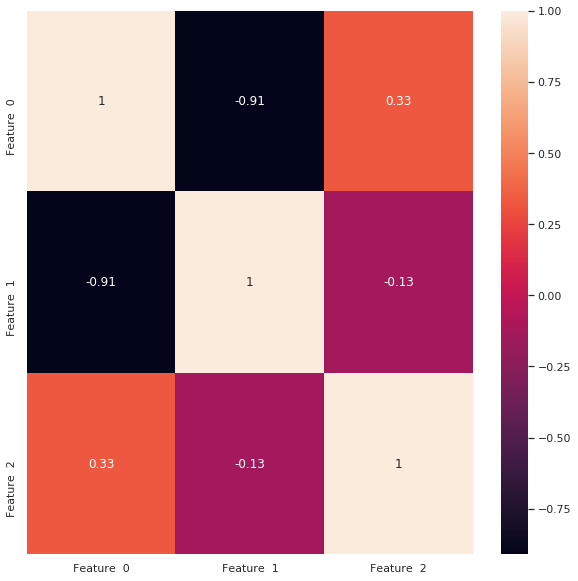

In [0]:
df_features = df.drop(["Label"],axis=1)
correlation_matrix = df_features.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [0]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
y = df.Label

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=15)

# Decision Tree Classifier

In [0]:
model_tree = DecisionTreeClassifier()
params = {
  "criterion": ["gini", "entropy"],
  "max_depth": range(1,10),
  "min_samples_split": range(1,10),
  "min_samples_leaf": range(1,5)
}

grid = GridSearchCV(
  model_tree,
  param_grid=params,
  cv=5,
  verbose=1,
  n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks | elapsed: 3.8s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 8.0s finished
Out[92]: GridSearchCV(cv=5, error_score=nan,
 estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
 criterion='gini', max_depth=None,
 max_features=None,
 max_leaf_nodes=None,
 min_impurity_decrease=0.0,
 min_impurity_split=None,
 min_samples_leaf=1,
 min_samples_split=2,
 min_weight_fraction_leaf=0.0,
 presort='deprecated',
 random_state=None,
 splitter='best'),
 iid='deprecated', n_jobs=-1,
 param_grid={'criterion': ['gini', 'entropy'],
 'max_depth': range(1, 10),
 'min_samples_leaf': range(1, 5),
 'min_samples_split': range(1, 10)},
 pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 scoring=None, verbose=1)

In [0]:
grid.best_score_

Out[93]: 0.9971428571428571

In [0]:
y_pred = grid.predict(X_test)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

precision recall f1-score support

 class 0 1.00 1.00 1.00 191
 class 1 0.98 1.00 0.99 203
 class 2 1.00 0.98 0.99 206

 accuracy 0.99 600
 macro avg 0.99 0.99 0.99 600
weighted avg 0.99 0.99 0.99 600

# XgBoost Classifier

In [0]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

model_xgb = XGBClassifier()

grid = GridSearchCV(
  model_xgb,
  param_grid=params,
  cv=5,
  verbose=1,
  n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 15 out of 15 | elapsed: 9.4s finished
/databricks/python/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
 warnings.warn(label_encoder_deprecation_msg, UserWarning)
[21:54:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Out[96]: GridSearchCV(cv=5, error_score=nan,
 estimator=XGBClassifier(base_score=None, booster=None,
 colsample_bylevel=None,
 colsample_bynode=None,
 colsample_bytree=None, gamma=None,
 gpu_id=None, importance_type='gain',
 interaction_constraints=None,
 learning_rate=None, max_delta_step=None,
 max_depth=None, min_child_weight=None,
 missing=nan, monotone_constraints=None,
 n_estim...
 num_parallel_tree=None,
 objective='binary:logistic',
 random_state=None, reg_alpha=None,
 reg_lambda=None, scale_pos_weight=None,
 subsample=None, tree_method=None,
 use_label_encoder=True,
 validate_parameters=None, verbosity=None),
 iid='deprecated', n_jobs=-1,
 param_grid={'min_child_weight': [1, 5, 10]},
 pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 scoring=None, verbose=1)

In [0]:
grid.best_score_

Out[97]: 0.9985714285714286

In [0]:
y_pred = grid.predict(X_test)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

precision recall f1-score support

 class 0 1.00 1.00 1.00 191
 class 1 1.00 1.00 1.00 203
 class 2 1.00 1.00 1.00 206

 accuracy 1.00 600
 macro avg 1.00 1.00 1.00 600
weighted avg 1.00 1.00 1.00 600